# Stage S5 :

${} \;$ 

$$\textbf{BRADAI Zakaria} \quad \quad - \quad \quad \textbf{MALANDA Sam-Rayden}$$

$$\textbf{L3 Physique SPRINT}$$

$$\textbf{Encadrant : Matthieu Delbecq}$$

$$\textbf{Laboratoire d'accueil : LPENS - équipe Circuits Quantiques Hybrides HQC}$$

${} \;$

${} \;$

#    $$\text{Le gyroscope en tant qu'analogue mécanique d'un Spin 1/2}$$


${} \;$

${} \;$

---------
---
---

In [1]:
from GyroSolver import *
import numpy as np
import matplotlib.pyplot as plt

# I- Introduction :

Ce stage est réalisé dans le cadre de l'UE LU3PY205 du S5, au sein de l'équipe Circuits Quantiques Hybrides $HCQ$ du Laboratoire de Physique de l'École Normale Supérieure d'Ulm $LPENS$, sous l'encadrement du Dr. Matthieu Delbecq.

# II- Mouvement libre du Gyroscope :

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est :

$$\mathcal{H}_\text{libre} = \dfrac{p_\theta^2}{2 \tilde{J_1}} + \dfrac{p_\psi^2}{2 J_3} + \dfrac{\left( p_\varphi - \cos(\theta)p_\psi \right)^2}{2\tilde{J_1} \sin^2(\theta)} + mgh\cos(\theta) $$

Cet Hamiltonien peut se mettre sous la forme plus commode :

$$\mathcal{H}_\text{libre} = \mathcal{T}_\psi + \mathcal{T}_\theta + \mathcal{N} - \overrightarrow{PG} \cdot m\overrightarrow{g} $$

Où $\mathcal{T}_\psi$ représente l'énergie de rotation "propre", $\mathcal{T}_\theta$ l'énergie de rotation dûe à la Nutation (variation de la colatitude $\theta$), et enfin $\mathcal{N}$ le terme divergent responsable de la Nutation. 

On intoduit les moments conjugués aux angles d'Euler :

$$ \left\{ \begin{array}{r c l c l} 
p_\theta & = & \tilde{J}_1 \dot{\theta}  \\
p_\varphi & = & \tilde{J}_1 \sin^2(\theta) \varphi + \cos(\theta) p_\psi  \\
p_\psi & = &  J_3\left( \dot{\psi} + \cos(\theta) \dot{\varphi} \right)
\end{array}   \right. $$  

Où $\tilde{J}_1 = J_1 + mh^2$

$\;$



Pour la simulation numérique, on déduit les équations du mouvement à partir des équation de Hamilton, on alors :



$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) + \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2  \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta}   \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} 
\end{array}   \right. $$  



On obtient ainsi un système de 3 équations différentielles non-linéraires couplées d'ordre 1. ???


Les paramètres du problème sont estimés à partir des valeurs constructeurs du Gyroscope.


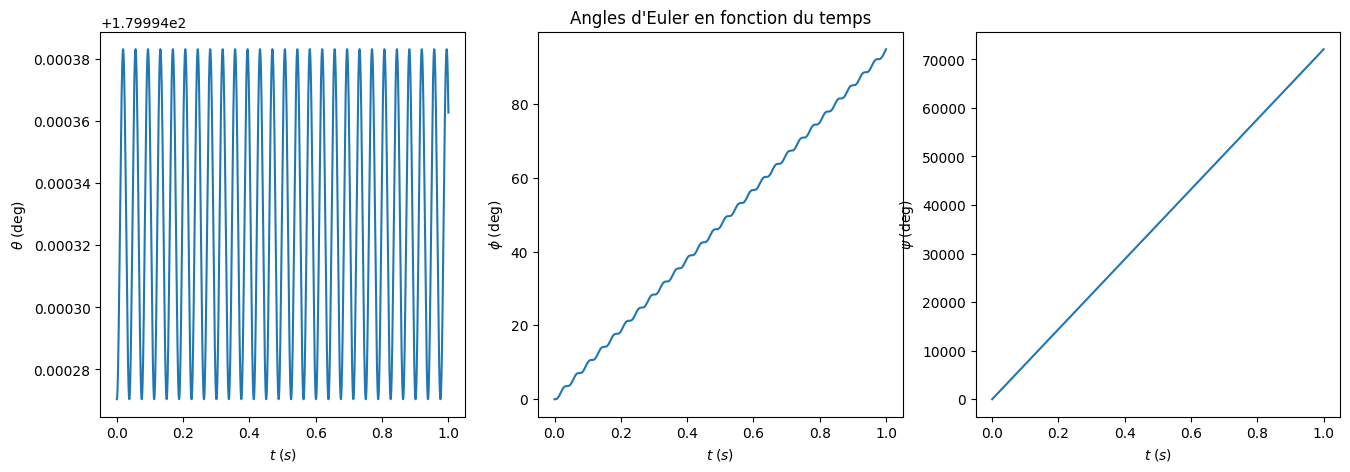

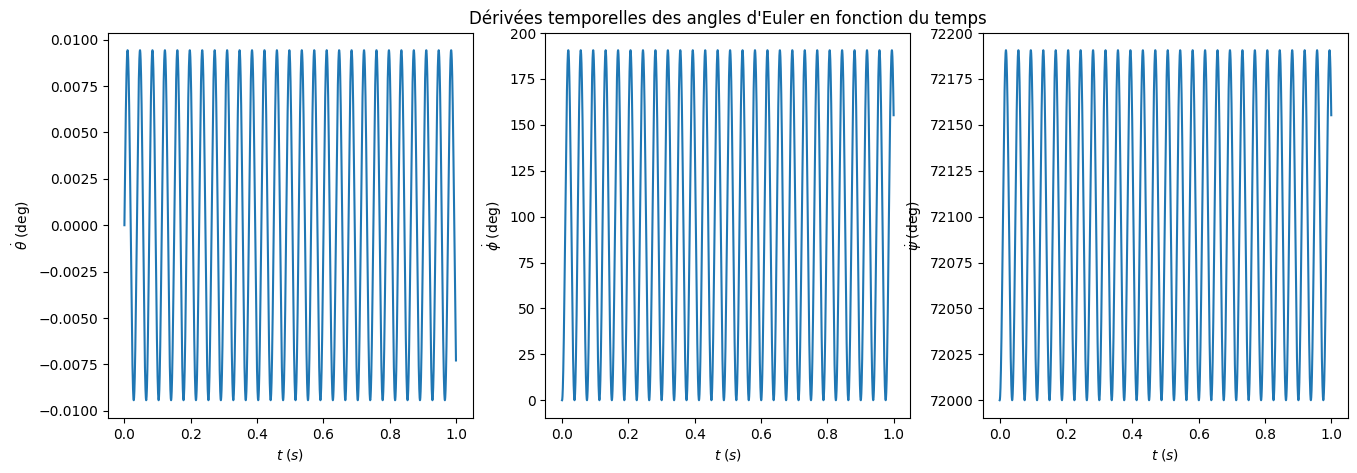

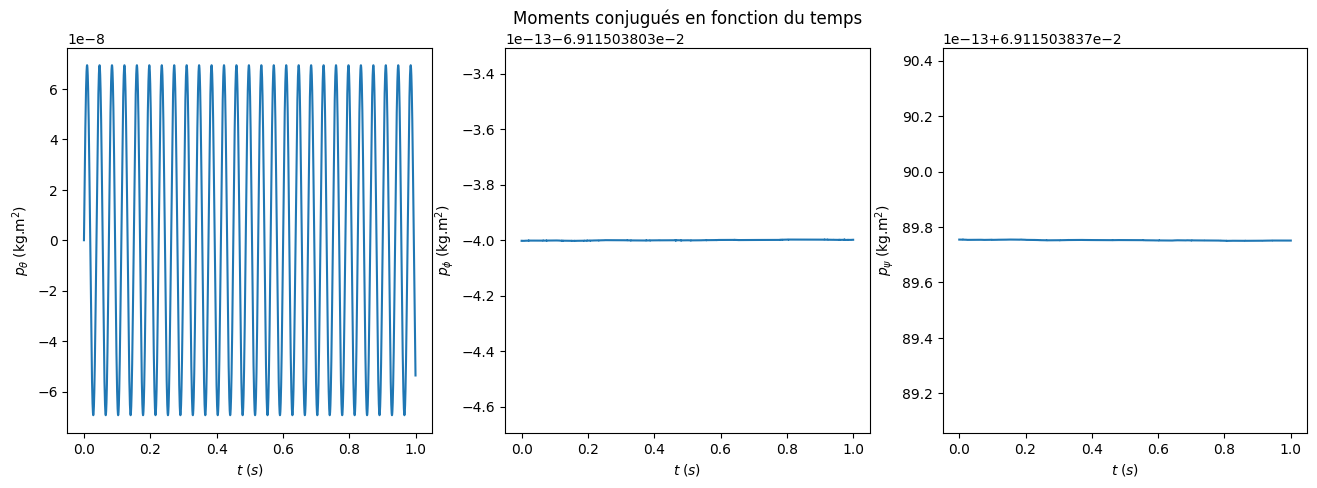

In [2]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1
f_exc = 0.1
p = 0.1

params = [g, m, h, J1, J3, x0, p, f_exc]
#CI = [np.pi / 6, 0, 0, 9.936, 0, 2 * np.pi * 200]
CI = [np.pi-0.0001, 0, 0, 0, 0, 2 * np.pi * 200]

t, the_free, phi_free, psi_free, the_d_free, phi_d_free, psi_d_free = Solve_Gyro(0, 1, CI, params, 
                                    solving_method='RK23', forcing='FREE', nb_points=10000)

p_the_free, p_phi_free, p_psi_free = Conjugated_Momentums(the_free, phi_free, 
                                    psi_free, the_d_free, phi_d_free, psi_d_free, params)

Plot_Gyro_Angles(t, the_free, phi_free, psi_free)

Plot_Gyro_Speed_Angles(t, the_d_free, phi_d_free, psi_d_free)

Plot_Gyro_Momentum(t, p_the_free, p_phi_free, p_psi_free)



In [3]:
#path_Free = Get_Path(t, the_free, phi_free, psi_free)
#path_Free

$\;$

On note $\left( \vec{u}_\theta, \vec{u}_\varphi, \vec{u}_\psi \right)$ les vecteurs normées associées aux rotations des angles d'Euler, ils sont donnés dans la base cartésienne $\beta$ par :

$$\left\{  \begin{array}{r c l} 
\vec{u}_\theta & = & \left[ \cos(\varphi), \; \sin(\varphi), \; 0 \right]_\beta = \vec{u}_\rho \\
\vec{u}_\varphi & = & \left[ 0, \; 0, \; 1 \right]_\beta = \vec{u}_z  \\
\vec{u}_\psi & = & \left[ \sin(\theta)\sin(\varphi), \; -\sin(\theta) \cos(\varphi), \; \cos(\theta) \right]_\beta
\end{array} \right .   $$

Le poids $\vec{P}$ qui donne naissance à la précession exerce un moment que l'on note $\Gamma(\vec{P})$ donné par :

$$ \Gamma(\vec{P}) = mg\sin(\theta) \vec{u}_\theta $$

$\;$

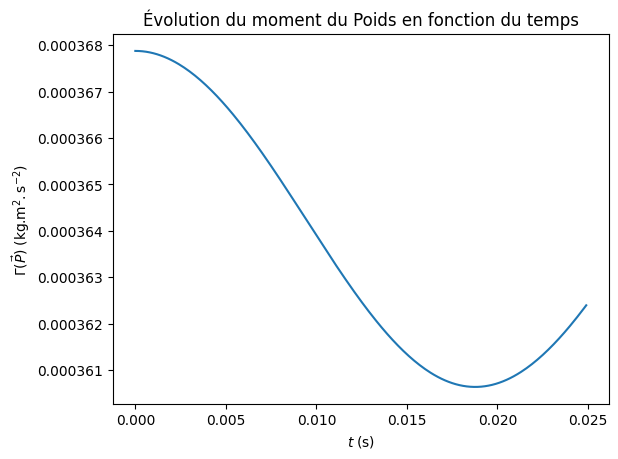

In [4]:
Gamma_P = Momentum_Weight(the_free, phi_free, psi_free, params)

plt.figure()
plt.plot(t[:250], Gamma_P[:250])
plt.xlabel(r'$t \; (\text{s})$')
plt.ylabel(r'$\Gamma(\vec{P}) \; (\text{kg.m}^2.\text{s}^{-2})$')
plt.title('Évolution du moment du Poids en fonction du temps')
plt.show()

# II- Mouvement Forcé :

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est pour un forçage selon XY :

$$\mathcal{H} = \mathcal{H}_\text{libre} - mhx_0\omega^2 \sin(\omega t + \Phi - \varphi) \sin(\theta) $$

Les équations du mouvement deviennent donc :

$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) + \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2 - \dfrac{mhx_0\omega^2}{\tilde{J}_1}\cos(\theta) \sin(\omega t + \Phi - \varphi) \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta} + \dfrac{mhx_0\omega^2}{\tilde{J}_1}\dfrac{\cos(\omega t + \Phi - \varphi)}{\sin(\theta)}   \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} - \dfrac{mhx_0\omega^2}{\tilde{J}_1} \dfrac{\cos(\omega t+\Phi -\varphi)}{\tan(\theta)}
\end{array}   \right. $$ 

In [49]:
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]
x0 =  10 * 1e-2     # m
f_exc = 0.265          # s^-1        
p = np.pi         # rad

params = [g, m, h, J1, J3, x0, p, f_exc]

Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.024
Rabi Period (th) :             +267.331
Temps de montée (th) :             +133.666 

Rapport des pulsations Larmor/Rabi :              +70.770 

Rapport Approx Gyroscopique :          +14_912.892 



Duration : 4.493624925613403


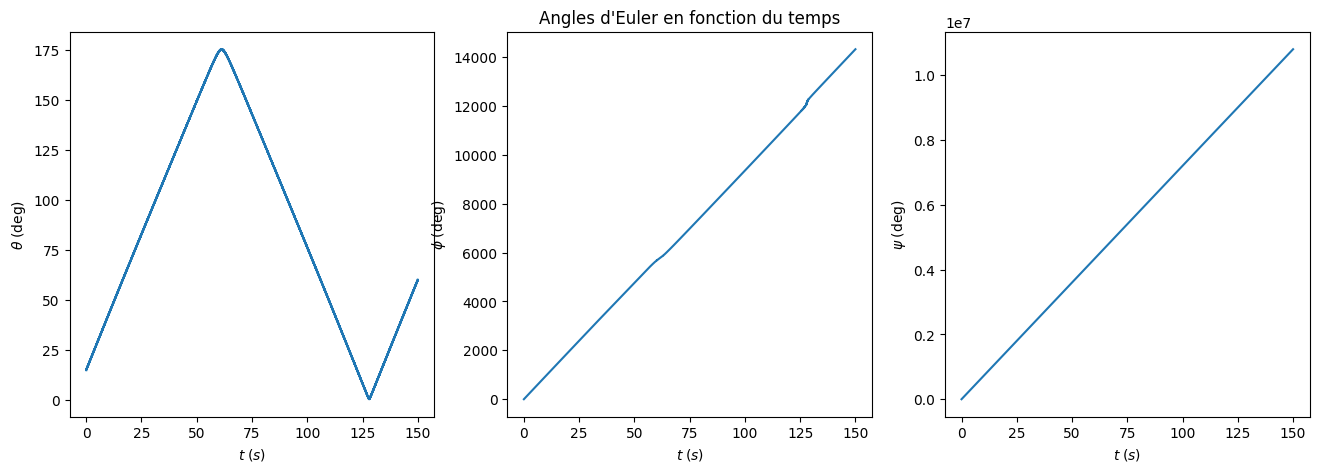

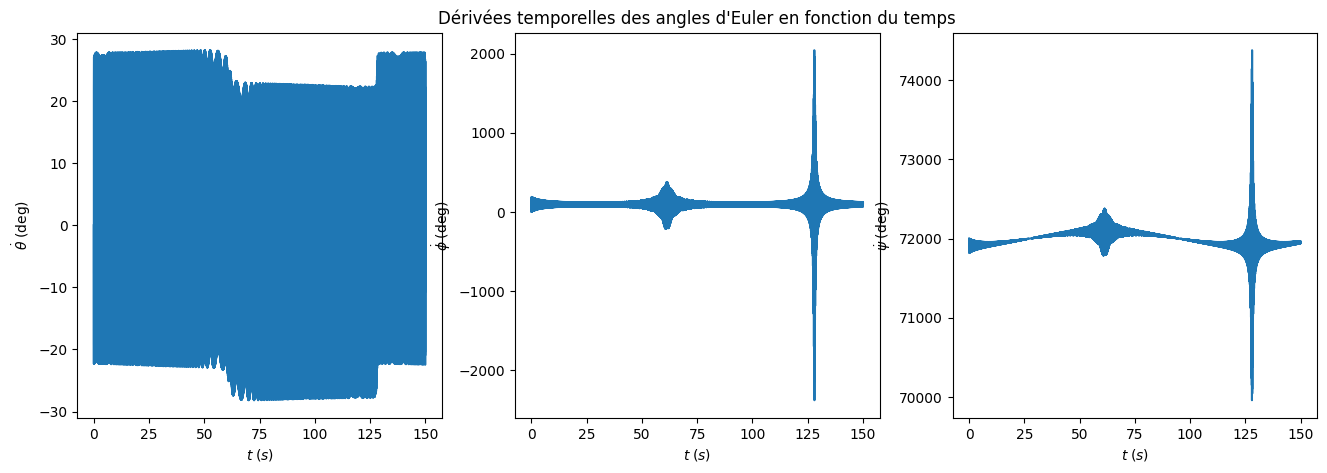

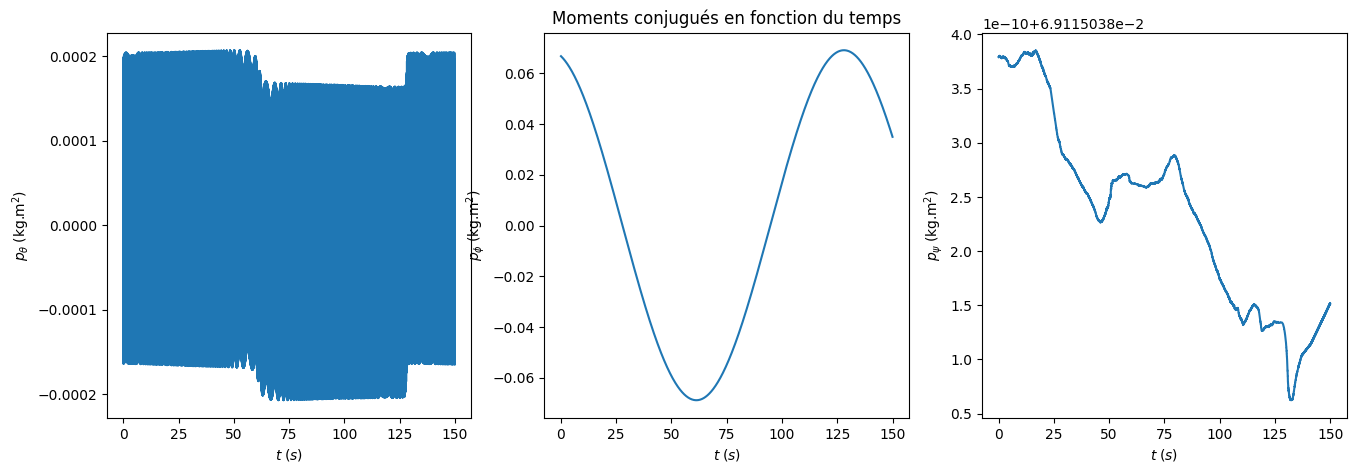

In [51]:
from time import time
t1 = time()
t, the, phi, psi, the_d, phi_d, psi_d = Solve_Gyro(0, 150, CI, params, solving_method='RK23', forcing='XY', nb_points=10000)
t2 = time()
print('Duration :', t2-t1)

path_Forced = Get_Path(t, the, phi, psi)
#path_Forced

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)



$\;$

En plus du poids, un peseudo-force d'entraînement $\vec{F}_e = -m\vec{a}_e$ s'applique sur le Gyroscope, son expression est donnée pour des forçages X et XY :

$$ \vec{F}_X = \omega^2 mx_0 \cos(\omega t + \Phi)\vec{u_x} $$
$$ \vec{F}_{XY} = \omega^2 mx_0 \left[\cos(\omega t + \Phi)\vec{u_x} + \sin(\omega t + \Phi)\vec{u_y} \right]$$

Elle exerce un moment $\Gamma(\vec{F}_e)$ donné pour un forçage XY par :

$$ \left \{ \begin{array}{r c l} 
\Gamma(\vec{F}_e) \cdot \vec{u}_\theta & = &   -\omega^2 m x_0 \sin(\omega t+\Phi - \varphi)\cos(\theta) \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\varphi & = &  \omega^2 m x_0 \cos(\omega t+\Phi - \varphi)\sin(\theta)    \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\psi & = &   0  
\end{array}  \right. $$



Pour un forçage X :

$$ \left \{ \begin{array}{r c l} 
\Gamma(\vec{F}_e) \cdot \vec{u}_\theta & = &   \omega^2 m x_0 \sin(\varphi)\cos(\omega t + \Phi)\cos(\theta) \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\varphi & = &  \omega^2 m x_0 \cos(\varphi)\cos(\omega t+\Phi )\sin(\theta)    \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\psi & = &   0  
\end{array}  \right. $$


$\;$

### Assymétrie du forçage :

Estimated time : 136


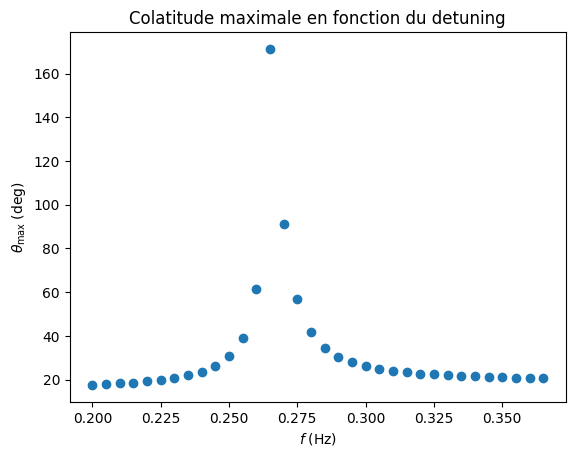

166.55399870872498


In [55]:
tab_freq_sweep = np.arange(0.2, 0.37, 0.005) 
print('Estimated time :', len(tab_freq_sweep) * 4)
t1 = time()
f_max, exc_freq, tab_theta, tab_theta_min, tab_t = Frequency_Sweep_MAX(tab_freq_sweep, params, CI, tf=150
                        , solving_method='RK23', plot=True, forcing='X')
t2 = time()
print(t2 - t1)

Estimated time : 136


/Users/bradaizakaria/Documents/venvL3/envL3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



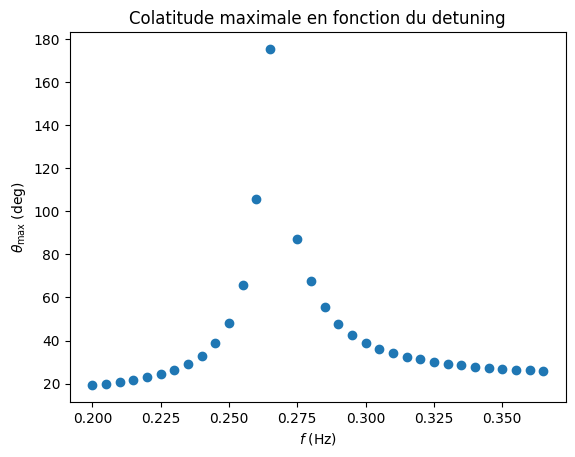

In [31]:
tab_freq_sweep = np.arange(0.2, 0.37, 0.005) 
print('Estimated time :', len(tab_freq_sweep) * 4)
t1 = time()
f_max, exc_freq, tab_theta, tab_theta_min, tab_t = Frequency_Sweep_MAX(tab_freq_sweep, params, CI, tf=150
                        , solving_method='RK23', plot=True, forcing='XY')
t2 = time()
print(t2 - t1)

Estimated time : 52.0


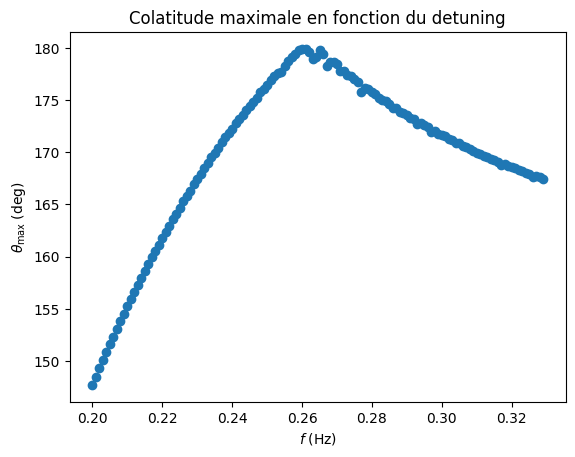

In [21]:
tab_freq_sweep = np.arange(0.2, 0.33, 0.001) 
print('Estimated time :', len(tab_freq_sweep) * 0.4)

f_max, exc_freq, tab_theta, tab_theta_min, tab_t = Frequency_Sweep_MAX(tab_freq_sweep, params, CI, tf=5
                        , solving_method='RK23', plot=True, forcing='XY')

[0.329 0.328 0.327 0.326 0.325 0.324 0.323 0.322 0.321 0.32  0.319 0.318
 0.317 0.316 0.315 0.314 0.313 0.312 0.311 0.31  0.309 0.308 0.307 0.306
 0.305 0.304 0.303 0.302 0.301 0.3   0.299 0.298 0.297 0.296 0.295 0.294
 0.293 0.292 0.291 0.29  0.289 0.288 0.287 0.286 0.285 0.284 0.283 0.282
 0.281 0.28  0.279 0.278 0.277 0.276 0.275 0.274 0.273 0.272 0.271 0.27
 0.269 0.268 0.267 0.266 0.265 0.264 0.263 0.262 0.261 0.26  0.259 0.258
 0.257 0.256 0.255 0.254 0.253 0.252 0.251 0.25  0.249 0.248 0.247 0.246
 0.245 0.244 0.243 0.242 0.241 0.24  0.239 0.238 0.237 0.236 0.235 0.234
 0.233 0.232 0.231 0.23  0.229 0.228 0.227 0.226 0.225 0.224 0.223 0.222
 0.221 0.22  0.219 0.218 0.217 0.216 0.215 0.214 0.213 0.212 0.211 0.21
 0.209 0.208 0.207 0.206 0.205 0.204 0.203 0.202 0.201 0.2  ]
Estimated time : 52.0


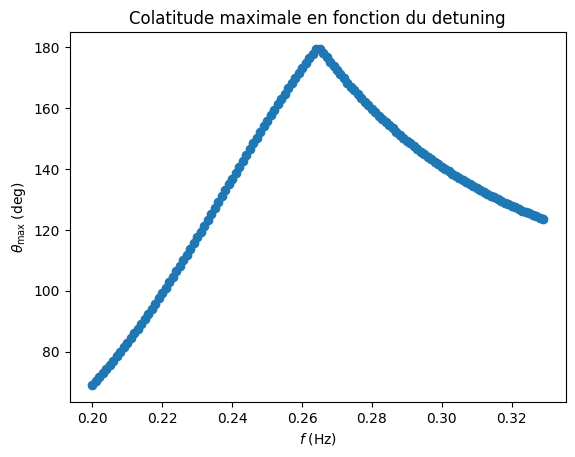

In [17]:
tab_freq_sweep = np.arange(0.2, 0.33, 0.001) 
tab_freq_sweep = np.flip(tab_freq_sweep)
print(tab_freq_sweep)
print('Estimated time :', len(tab_freq_sweep) * 0.4)

f_max, exc_freq, tab_theta, tab_theta_min, tab_t = Frequency_Sweep_MAX(tab_freq_sweep, params, CI, tf=15
                        , solving_method='RK23', plot=True, forcing='XY')

### Assymétrie des Chevrons de Rabi :

In [11]:
tab_t_burst = np.linspace(0, 10, 51, endpoint=True)
exc_freq = np.linspace(0.6, 1.6, 51, endpoint=True)

In [14]:

tab_theta, list_the, list_t = Rabi_Chevron(exc_freq, tab_t_burst, params, CI, 
                                           solving_method='RK23', forcing='XY')


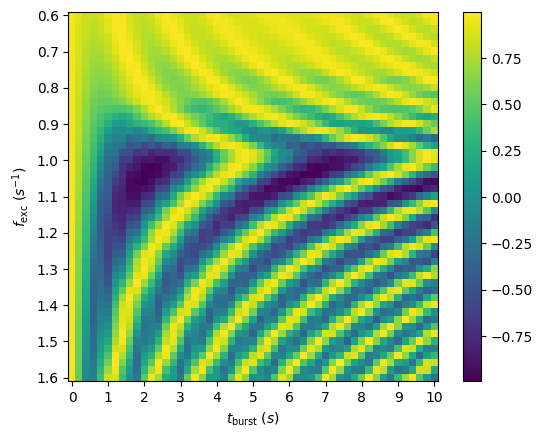

In [21]:
plt.figure()
plt.imshow(np.cos(tab_theta))
plt.colorbar()
plt.xticks(np.arange(0, 51, 5), tab_t_burst[np.arange(0, 51, 5)].astype(int) ) 
plt.yticks(np.arange(0, 51, 5), exc_freq[np.arange(0, 51, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()